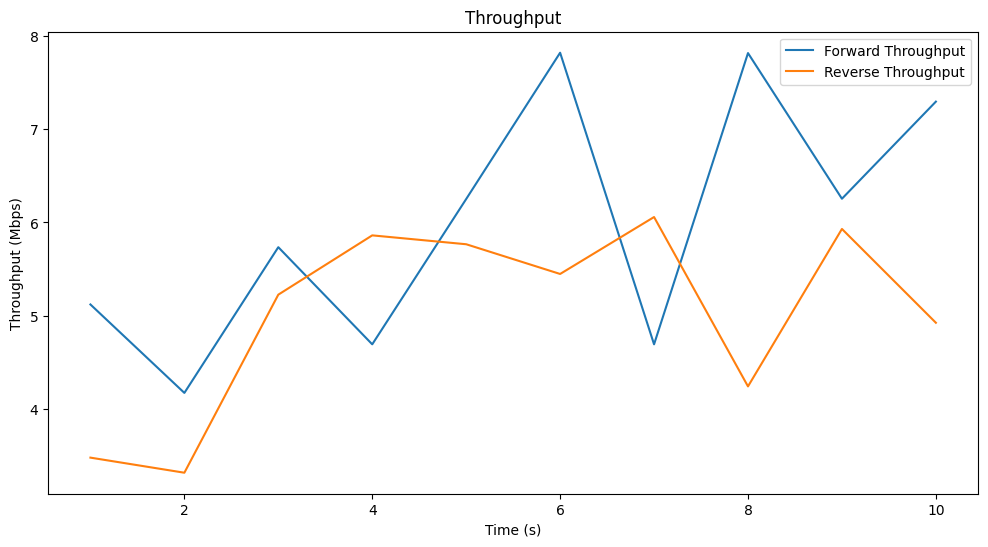

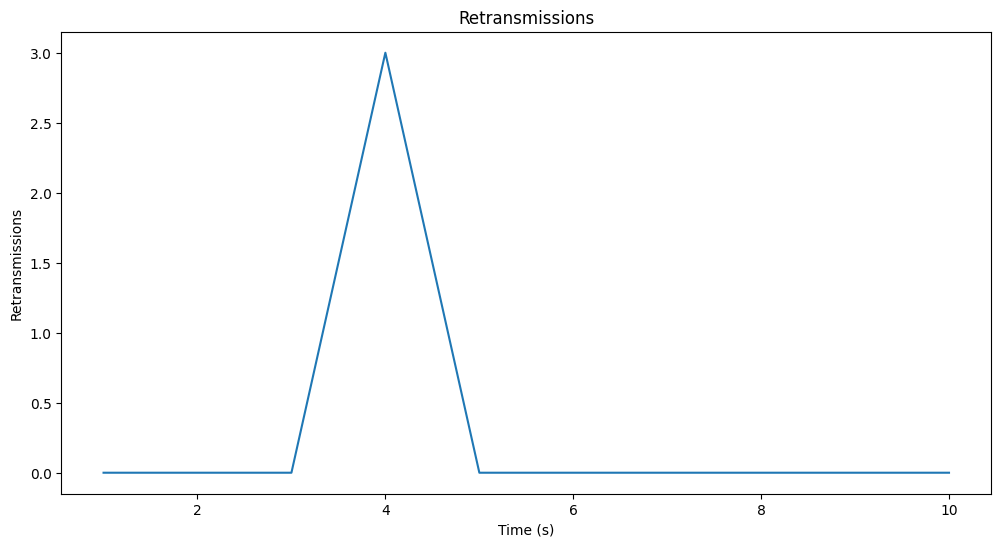

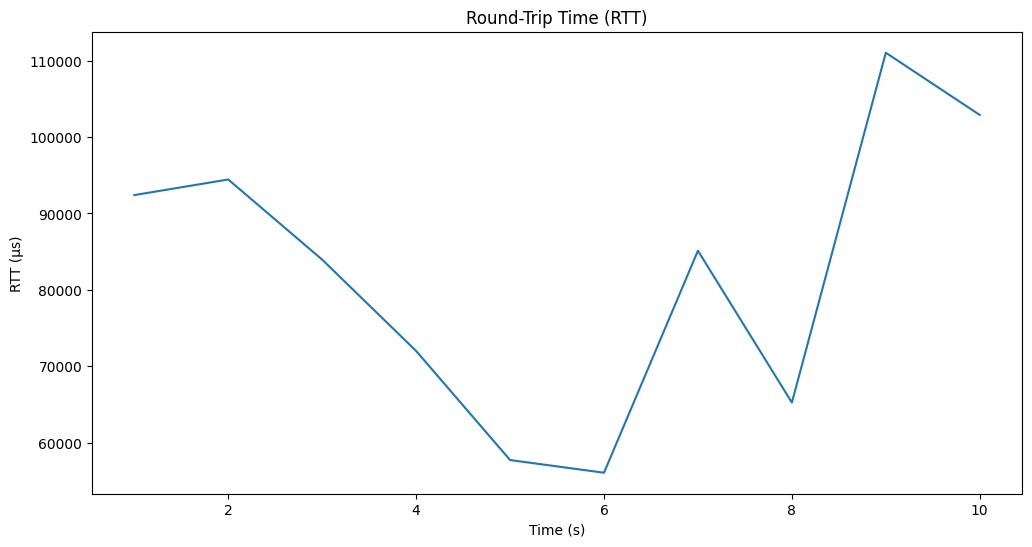

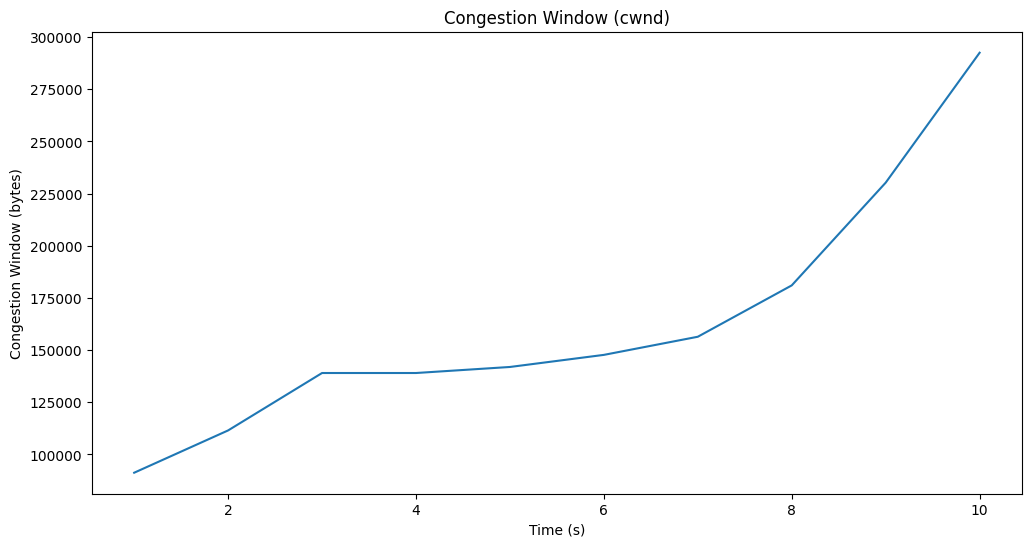

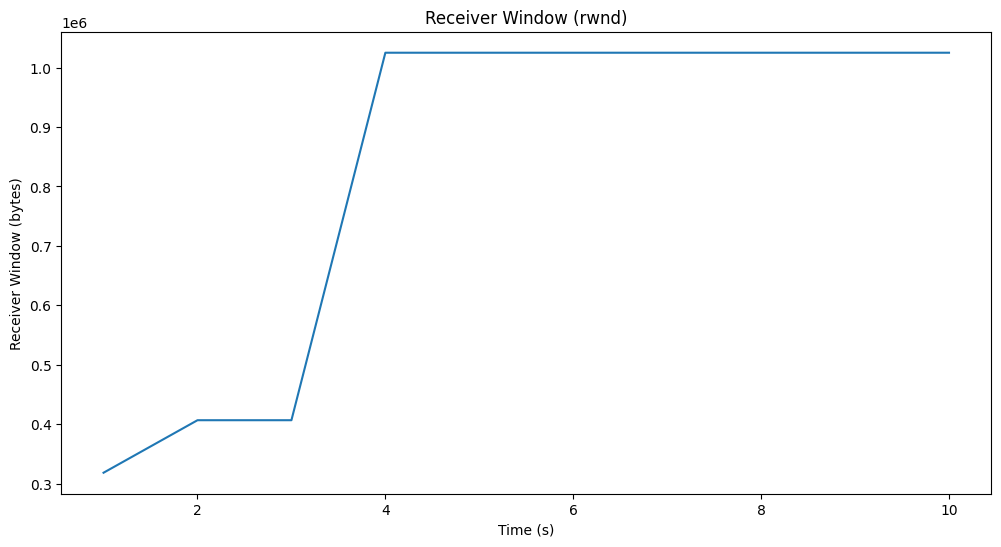

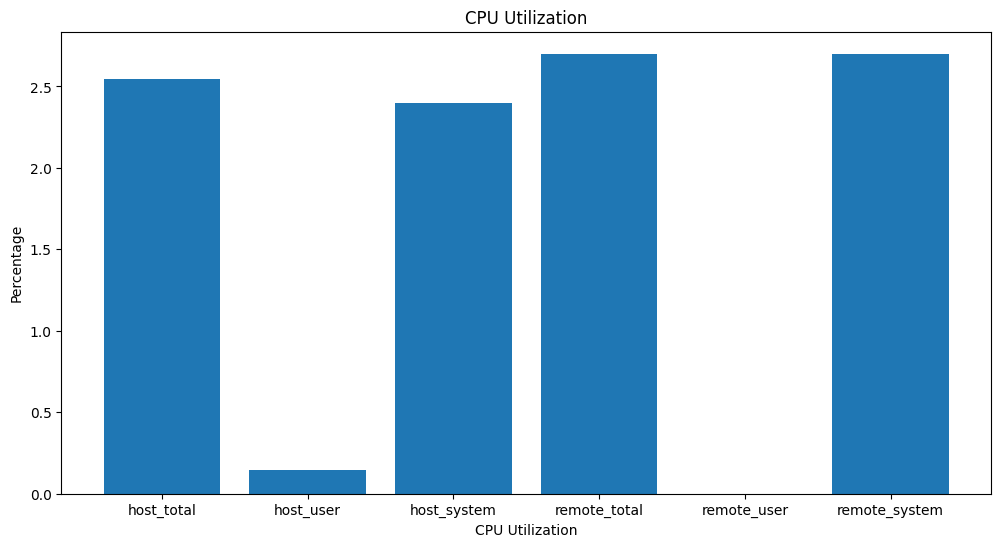

In [1]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
with open('test.json') as f:
    data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
timestamps = [interval['sum']['end'] for interval in intervals]
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput
plt.figure(figsize=(12, 6))
plt.plot(timestamps, throughputs, label='Forward Throughput')
plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput')
plt.legend()
plt.show()

# Retransmissions
plt.figure(figsize=(12, 6))
plt.plot(timestamps, retransmits)
plt.xlabel('Time (s)')
plt.ylabel('Retransmissions')
plt.title('Retransmissions')
plt.show()

# Round-Trip Time (RTT)
plt.figure(figsize=(12, 6))
plt.plot(timestamps, rtts)
plt.xlabel('Time (s)')
plt.ylabel('RTT (μs)')
plt.title('Round-Trip Time (RTT)')
plt.show()

# Congestion Window (cwnd)
plt.figure(figsize=(12, 6))
plt.plot(timestamps, cwnds)
plt.xlabel('Time (s)')
plt.ylabel('Congestion Window (bytes)')
plt.title('Congestion Window (cwnd)')
plt.show()

# Receiver Window (rwnd)
plt.figure(figsize=(12, 6))
plt.plot(timestamps, rwnds)
plt.xlabel('Time (s)')
plt.ylabel('Receiver Window (bytes)')
plt.title('Receiver Window (rwnd)')
plt.show()

# CPU Utilization
cpu_util = data['end']['cpu_utilization_percent']
cpu_names = list(cpu_util.keys())
cpu_values = list(cpu_util.values())

plt.figure(figsize=(12, 6))
plt.bar(cpu_names, cpu_values)
plt.xlabel('CPU Utilization')
plt.ylabel('Percentage')
plt.title('CPU Utilization')
plt.show()

In [2]:
import json
import statistics

# Load the JSON data
with open('test.json') as f:
    data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
print("Throughput Statistics (Mbps):")
print(f"Mean Forward Throughput: {statistics.mean(throughputs):.2f}")
print(f"Median Forward Throughput: {statistics.median(throughputs):.2f}")
print(f"Max Forward Throughput: {max(throughputs):.2f}")
print(f"Min Forward Throughput: {min(throughputs):.2f}")
print(f"Standard Deviation Forward Throughput: {statistics.stdev(throughputs):.2f}")
print(f"Mean Reverse Throughput: {statistics.mean(reverse_throughputs):.2f}")
print(f"Median Reverse Throughput: {statistics.median(reverse_throughputs):.2f}")
print(f"Max Reverse Throughput: {max(reverse_throughputs):.2f}")
print(f"Min Reverse Throughput: {min(reverse_throughputs):.2f}")
print(f"Standard Deviation Reverse Throughput: {statistics.stdev(reverse_throughputs):.2f}")

# Retransmissions Statistics
print("\nRetransmissions Statistics:")
print(f"Total Retransmissions: {sum(retransmits)}")
print(f"Mean Retransmissions per Interval: {statistics.mean(retransmits):.2f}")
print(f"Median Retransmissions per Interval: {statistics.median(retransmits)}")
print(f"Max Retransmissions in an Interval: {max(retransmits)}")
print(f"Min Retransmissions in an Interval: {min(retransmits)}")

# RTT Statistics
print("\nRound-Trip Time (RTT) Statistics (μs):")
print(f"Mean RTT: {statistics.mean(rtts):.2f}")
print(f"Median RTT: {statistics.median(rtts):.2f}")
print(f"Max RTT: {max(rtts):.2f}")
print(f"Min RTT: {min(rtts):.2f}")
print(f"Standard Deviation RTT: {statistics.stdev(rtts):.2f}")

# Congestion Window Statistics
print("\nCongestion Window (cwnd) Statistics (bytes):")
print(f"Mean cwnd: {statistics.mean(cwnds):.2f}")
print(f"Median cwnd: {statistics.median(cwnds):.2f}")
print(f"Max cwnd: {max(cwnds):.2f}")
print(f"Min cwnd: {min(cwnds):.2f}")
print(f"Standard Deviation cwnd: {statistics.stdev(cwnds):.2f}")

# Receiver Window Statistics
print("\nReceiver Window (rwnd) Statistics (bytes):")
print(f"Mean rwnd: {statistics.mean(rwnds):.2f}")
print(f"Median rwnd: {statistics.median(rwnds):.2f}")
print(f"Max rwnd: {max(rwnds):.2f}")
print(f"Min rwnd: {min(rwnds):.2f}")
print(f"Standard Deviation rwnd: {statistics.stdev(rwnds):.2f}")

Throughput Statistics (Mbps):
Mean Forward Throughput: 5.99
Median Forward Throughput: 5.99
Max Forward Throughput: 7.82
Min Forward Throughput: 4.17
Standard Deviation Forward Throughput: 1.34
Mean Reverse Throughput: 5.02
Median Reverse Throughput: 5.34
Max Reverse Throughput: 6.06
Min Reverse Throughput: 3.31
Standard Deviation Reverse Throughput: 1.02

Retransmissions Statistics:
Total Retransmissions: 3
Mean Retransmissions per Interval: 0.30
Median Retransmissions per Interval: 0.0
Max Retransmissions in an Interval: 3
Min Retransmissions in an Interval: 0

Round-Trip Time (RTT) Statistics (μs):
Mean RTT: 82089.70
Median RTT: 84539.50
Max RTT: 111046.00
Min RTT: 56057.00
Standard Deviation RTT: 18857.59

Congestion Window (cwnd) Statistics (bytes):
Mean cwnd: 163044.80
Median cwnd: 144800.00
Max cwnd: 292496.00
Min cwnd: 91224.00
Standard Deviation cwnd: 58965.20

Receiver Window (rwnd) Statistics (bytes):
Mean rwnd: 830630.40
Median rwnd: 1024896.00
Max rwnd: 1024896.00
Min rwnd

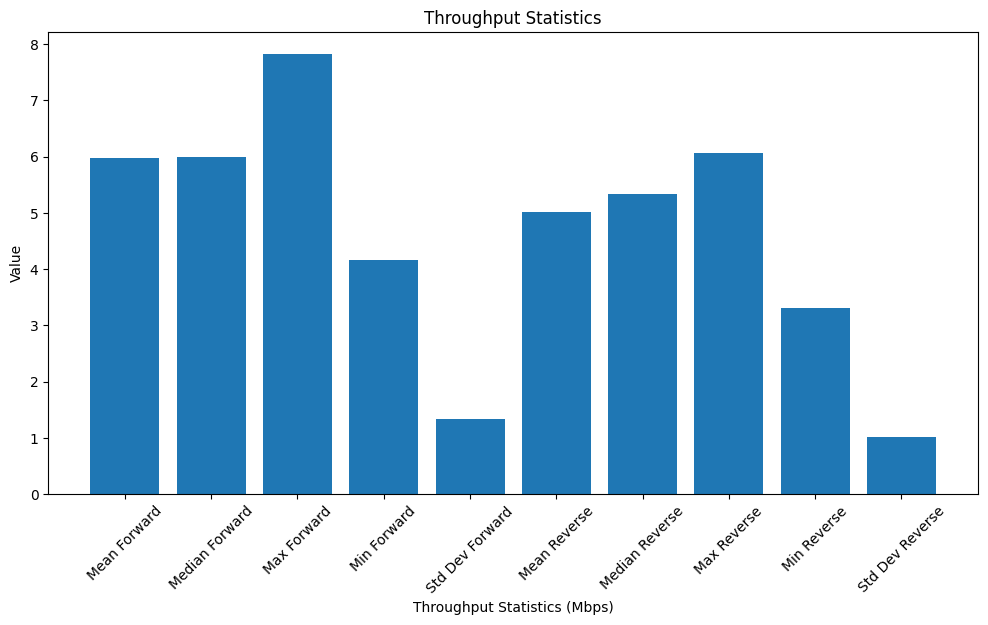

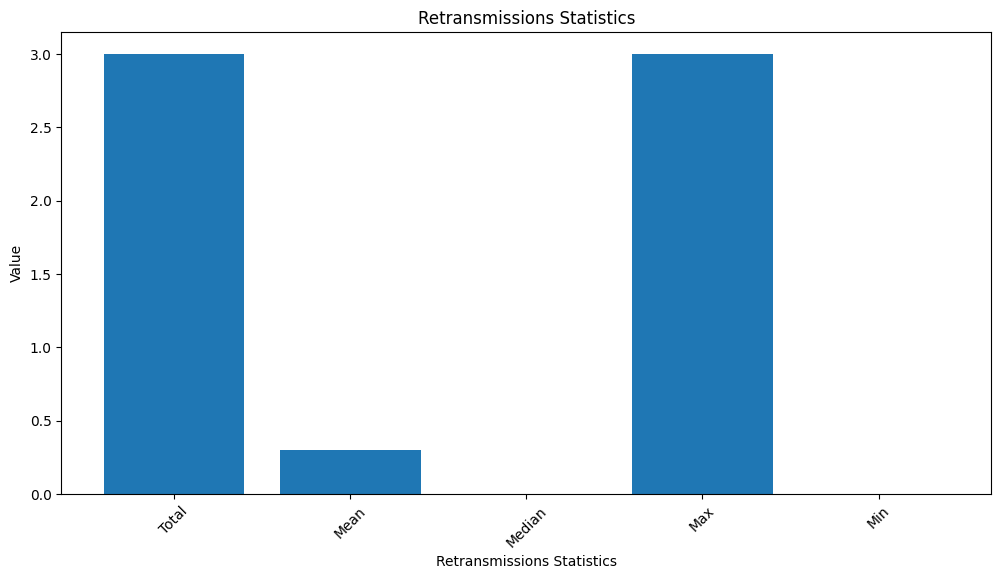

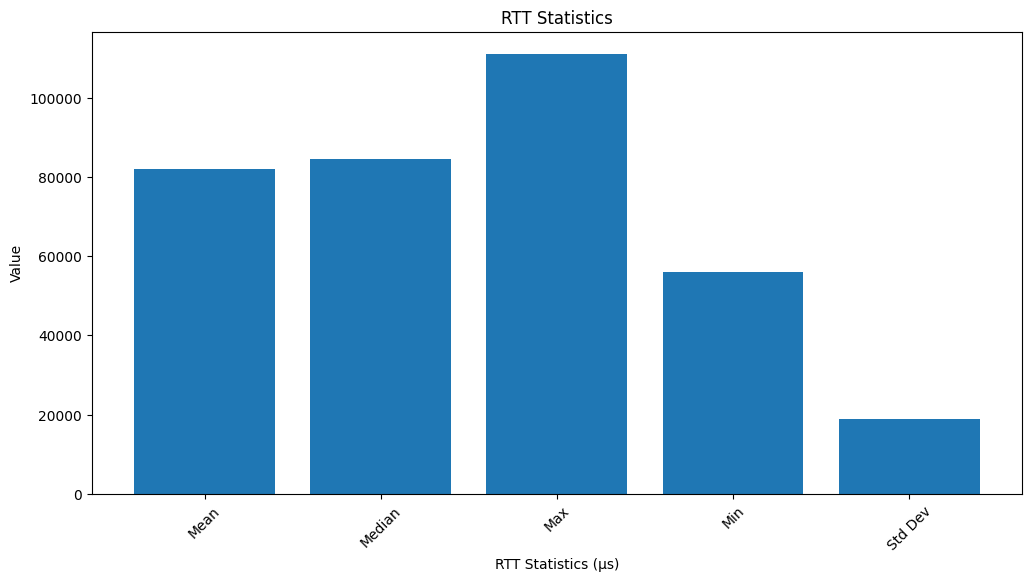

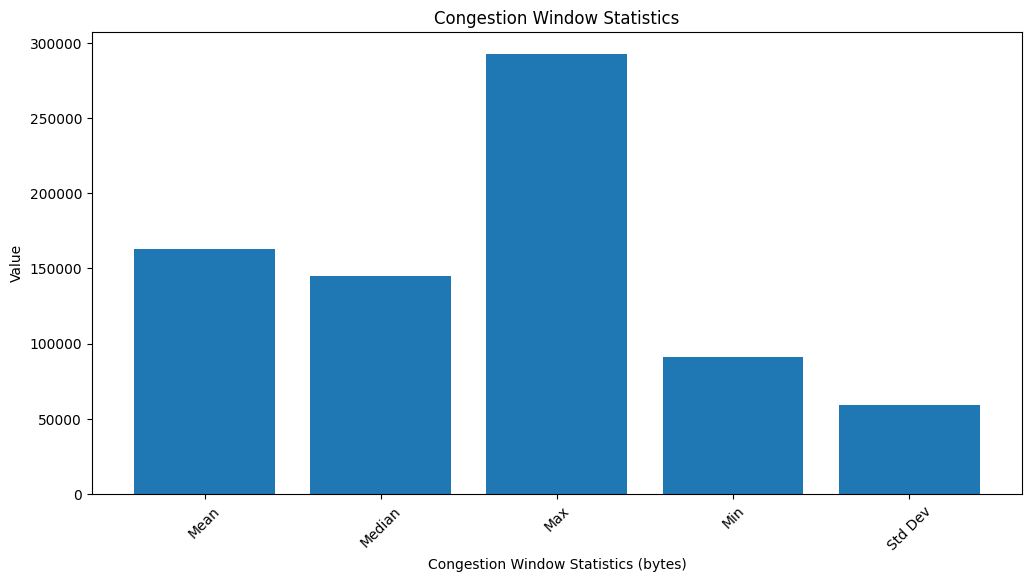

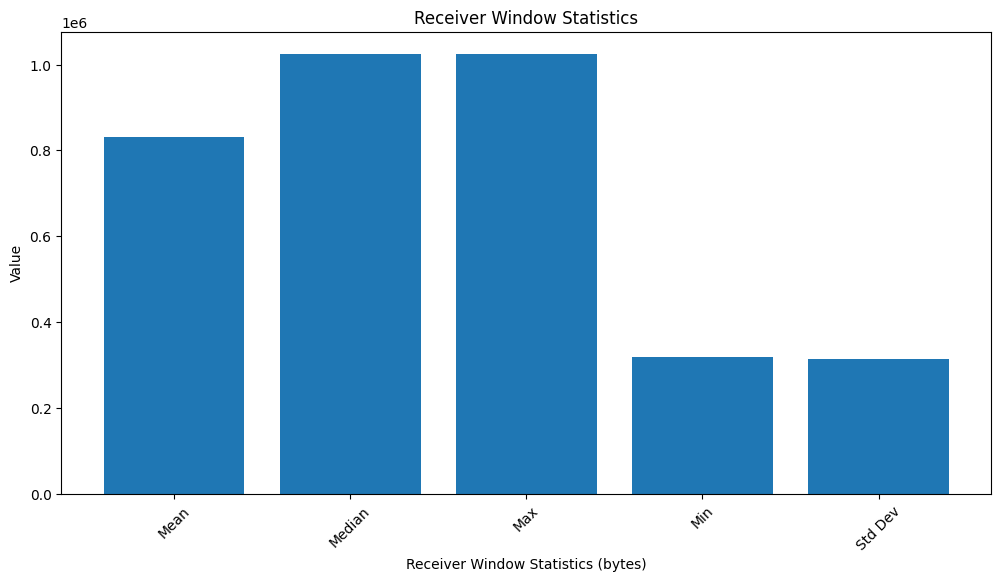

In [3]:
import json
import statistics
import matplotlib.pyplot as plt

# Load the JSON data
with open('test.json') as f:
    data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
throughput_stats = [
    statistics.mean(throughputs),
    statistics.median(throughputs),
    max(throughputs),
    min(throughputs),
    statistics.stdev(throughputs),
    statistics.mean(reverse_throughputs),
    statistics.median(reverse_throughputs),
    max(reverse_throughputs),
    min(reverse_throughputs),
    statistics.stdev(reverse_throughputs)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(throughput_stats)), throughput_stats)
plt.xticks(range(len(throughput_stats)), ['Mean Forward', 'Median Forward', 'Max Forward', 'Min Forward', 'Std Dev Forward', 'Mean Reverse', 'Median Reverse', 'Max Reverse', 'Min Reverse', 'Std Dev Reverse'], rotation=45)
plt.xlabel('Throughput Statistics (Mbps)')
plt.ylabel('Value')
plt.title('Throughput Statistics')
plt.show()

# Retransmissions Statistics
retransmit_stats = [
    sum(retransmits),
    statistics.mean(retransmits),
    statistics.median(retransmits),
    max(retransmits),
    min(retransmits)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(retransmit_stats)), retransmit_stats)
plt.xticks(range(len(retransmit_stats)), ['Total', 'Mean', 'Median', 'Max', 'Min'], rotation=45)
plt.xlabel('Retransmissions Statistics')
plt.ylabel('Value')
plt.title('Retransmissions Statistics')
plt.show()

# RTT Statistics
rtt_stats = [
    statistics.mean(rtts),
    statistics.median(rtts),
    max(rtts),
    min(rtts),
    statistics.stdev(rtts)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(rtt_stats)), rtt_stats)
plt.xticks(range(len(rtt_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('RTT Statistics (μs)')
plt.ylabel('Value')
plt.title('RTT Statistics')
plt.show()

# Congestion Window Statistics
cwnd_stats = [
    statistics.mean(cwnds),
    statistics.median(cwnds),
    max(cwnds),
    min(cwnds),
    statistics.stdev(cwnds)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(cwnd_stats)), cwnd_stats)
plt.xticks(range(len(cwnd_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('Congestion Window Statistics (bytes)')
plt.ylabel('Value')
plt.title('Congestion Window Statistics')
plt.show()

# Receiver Window Statistics
rwnd_stats = [
    statistics.mean(rwnds),
    statistics.median(rwnds),
    max(rwnds),
    min(rwnds),
    statistics.stdev(rwnds)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(rwnd_stats)), rwnd_stats)
plt.xticks(range(len(rwnd_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('Receiver Window Statistics (bytes)')
plt.ylabel('Value')
plt.title('Receiver Window Statistics')
plt.show()

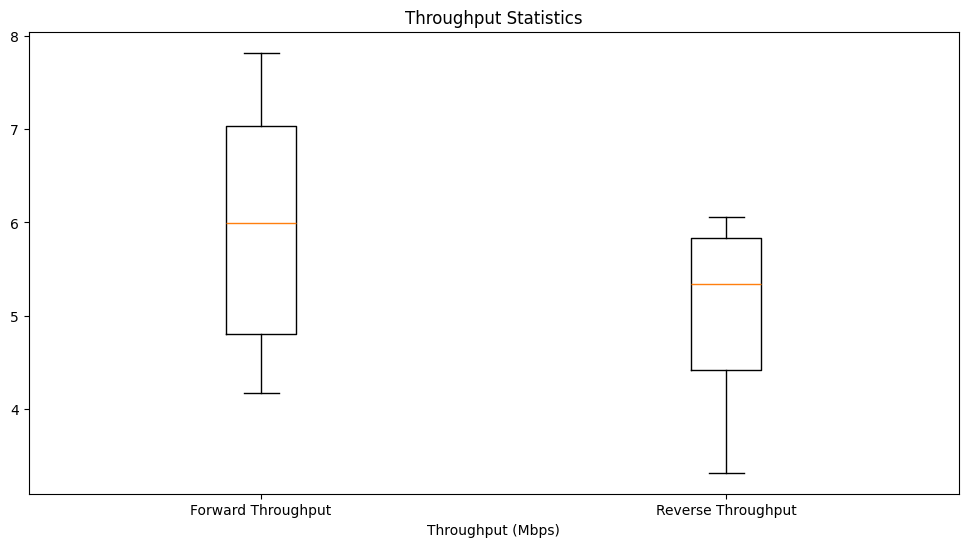

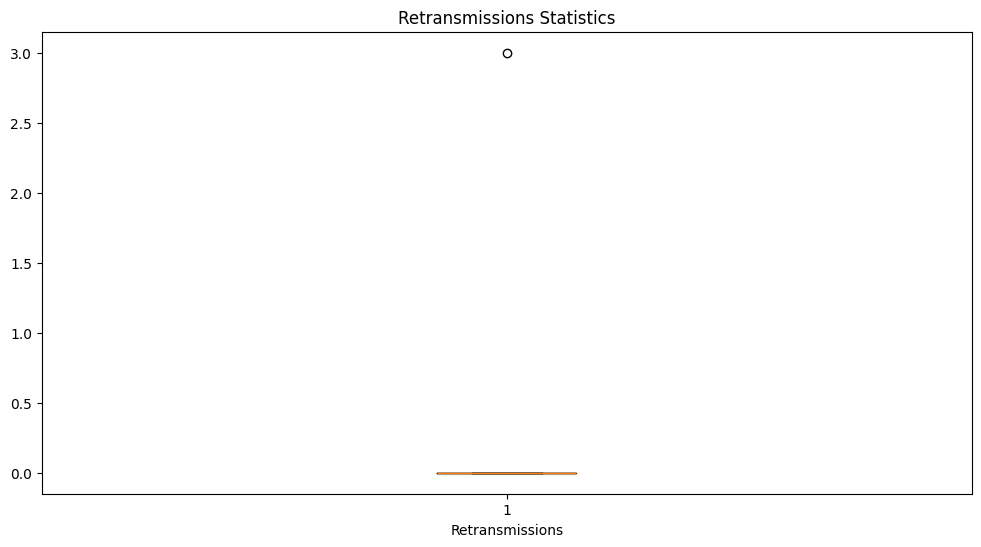

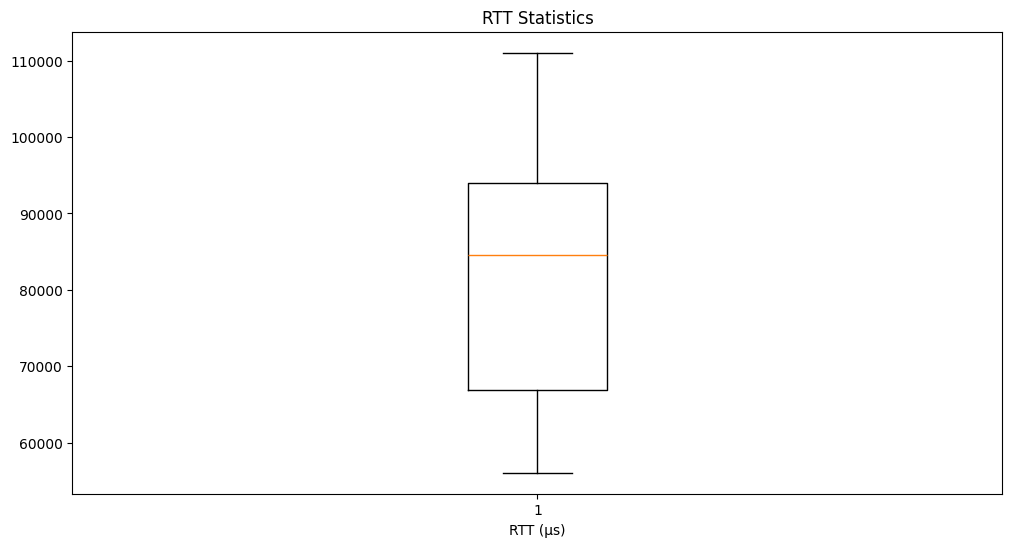

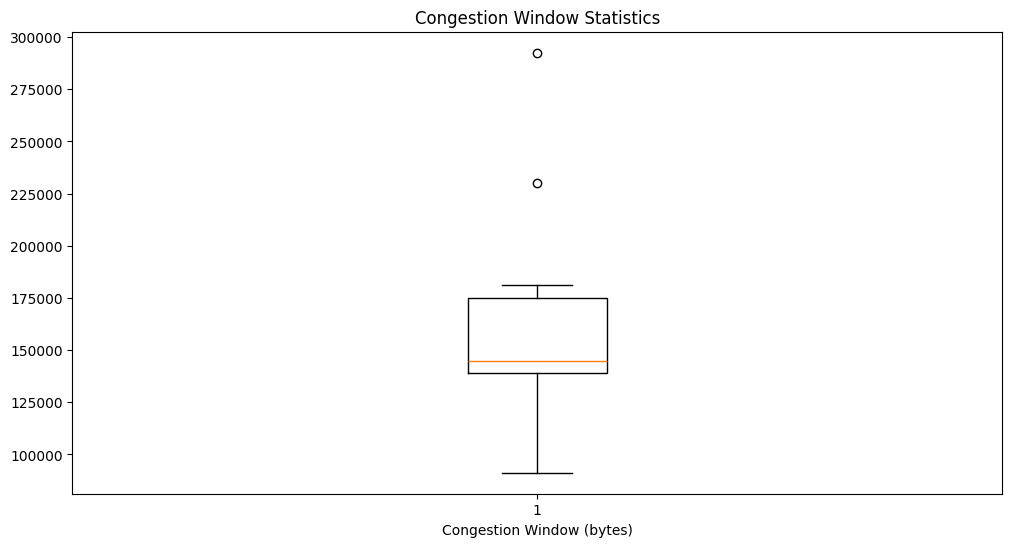

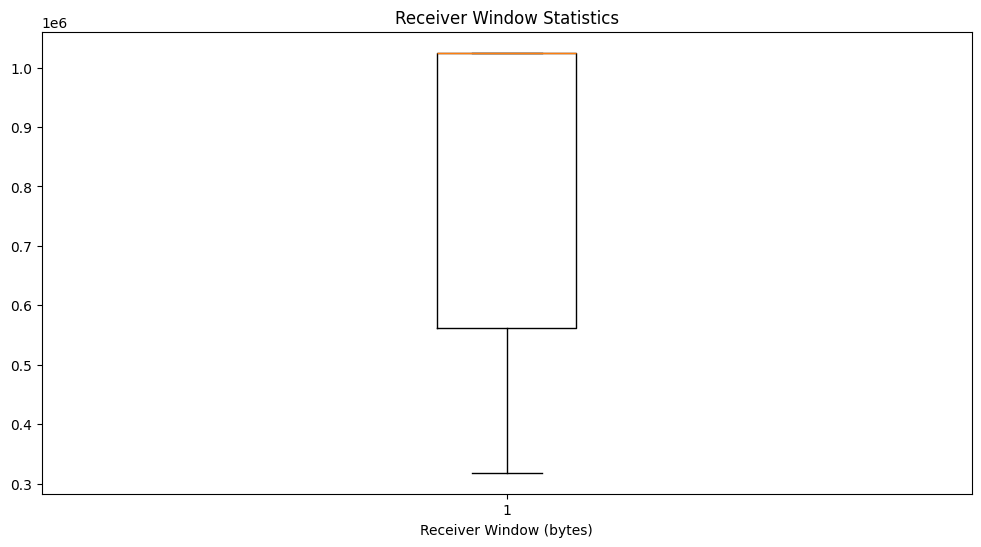

In [4]:
import json
import statistics
import matplotlib.pyplot as plt

# Load the JSON data
with open('test.json') as f:
    data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
throughput_stats = [throughputs, reverse_throughputs]
throughput_labels = ['Forward Throughput', 'Reverse Throughput']

plt.figure(figsize=(12, 6))
plt.boxplot(throughput_stats, labels=throughput_labels)
plt.xlabel('Throughput (Mbps)')
plt.title('Throughput Statistics')
plt.show()

# Retransmissions Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(retransmits)
plt.xlabel('Retransmissions')
plt.title('Retransmissions Statistics')
plt.show()

# RTT Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(rtts)
plt.xlabel('RTT (μs)')
plt.title('RTT Statistics')
plt.show()

# Congestion Window Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(cwnds)
plt.xlabel('Congestion Window (bytes)')
plt.title('Congestion Window Statistics')
plt.show()

# Receiver Window Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(rwnds)
plt.xlabel('Receiver Window (bytes)')
plt.title('Receiver Window Statistics')
plt.show()